In [1]:
import numpy as np
%matplotlib nbagg
from functools import partial
from qsim.mps import *
from qsim.plotting import plot_projections
from qsim.exact.state_vectors import normalise_state_vector
from qsim.exact.unitaries import create_heisenberg_u
from qsim.exact.hamiltonians import create_heisenberg_h
from qsim.exact.evolution_methods import time_evolution as exact_time_evolution
from qsim.exact.evolution_methods import time_evolution_trotter as trotter_time_evolution

### Make state vectors

In [2]:
num_of_qubits = 4
size_of_space = 2**num_of_qubits
state_vector_a = np.zeros(size_of_space, dtype=complex)
state_vector_b = np.zeros(size_of_space, dtype=complex)
state_vector_a[0] = 1
state_vector_b[4] = 1
state_vector_b[3] = 1
state_vector_b[-1] = 1
state_vector_a = normalise_state_vector(state_vector_a)
state_vector_b = normalise_state_vector(state_vector_b)
print('state a is ' + state_vectors_one_to_many(state_vector_a, as_str=True))
print('state b is ' + state_vectors_one_to_many(state_vector_b, as_str=True))

state a is 1.0+0.0j |0000>
state b is 0.6+0.0j |0011>+ 0.6+0.0j |0100>+ 0.6+0.0j |1111>


### Decompose into computational basis

In [3]:
state_vectors_one_to_many(state_vector_a)

array([[[-1.+0.j,  0.+0.j],
        [-1.+0.j,  0.+0.j],
        [-1.+0.j,  0.+0.j],
        [-1.+0.j,  0.+0.j]]])

### Create mps state from state vector or random and normalise

In [46]:
mps_a = create_specific_mps(state_vector_a)
a = normalise_mps(mps_a, direction='L')
mps_b = create_specific_mps(state_vector_b)
b = normalise_mps(mps_b, direction='L')
c = create_random_mps(num_of_qubits)

In [5]:
print('state a is ' + state_vectors_one_to_many(evaluate_mps(a), as_str=True))
print('state b is ' + state_vectors_one_to_many(evaluate_mps(b), as_str=True))
print('state c is ' + state_vectors_one_to_many(evaluate_mps(c), as_str=True))

state a is 1.0+0.0j |0000>
state b is 0.6+0.0j |0011>+ 0.6+0.0j |0100>+ 0.6+0.0j |1111>
state c is 0.0+0.2j |0000>+ 0.1+0.3j |0001>+ 0.0+0.2j |0010>+ 0.0+0.3j |0011>+ 0.0+0.3j |0100>+ 0.0+0.3j |0101>+ -0.0+0.2j |0110>+ 0.0+0.3j |0111>+ -0.0+0.2j |1000>+ -0.0+0.2j |1001>+ -0.0+0.2j |1010>+ -0.0+0.2j |1011>+ -0.0+0.2j |1100>+ 0.0+0.3j |1101>+ -0.0+0.2j |1110>+ 0.0+0.3j |1111>


### Find overlap and state amplitutes

In [6]:
find_overlap(a, b)

0j

In [7]:
evaluate_mps(b)

array([ 0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j,  0.57735027+0.j,
        0.57735027+0.j,  0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j,
        0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j,
        0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j,  0.57735027+0.j])

In [8]:
evaluate_mps(c, [0, 1, 1, 0])

(-0.00052242304931923722+0.24410586251135641j)

### Compress mps

In [9]:
[i.shape for i in b]

[(2, 1, 2), (2, 2, 4), (2, 4, 2), (2, 2, 1)]

In [10]:
compressed_b = normalise_mps(b, direction='R', max_d=2)
print('state b is ' + state_vectors_one_to_many(evaluate_mps(compressed_b), as_str=True))
compressed_c = normalise_mps(c, direction='R', max_d=2)
print('state c is ' + state_vectors_one_to_many(evaluate_mps(compressed_c), as_str=True))

state b is -0.6+0.0j |0011>+ -0.6+0.0j |0100>+ -0.6+0.0j |1111>
state c is -0.0-0.2j |0000>+ -0.1-0.3j |0001>+ -0.0-0.2j |0010>+ -0.0-0.3j |0011>+ -0.0-0.3j |0100>+ -0.0-0.3j |0101>+ 0.0-0.2j |0110>+ -0.0-0.3j |0111>+ 0.0-0.2j |1000>+ 0.0-0.2j |1001>+ 0.0-0.2j |1010>+ 0.0-0.2j |1011>+ 0.0-0.2j |1100>+ -0.0-0.3j |1101>+ 0.0-0.2j |1110>+ -0.0-0.3j |1111>


In [11]:
[i.shape for i in compressed_b]

[(2, 1, 2), (2, 2, 2), (2, 2, 2), (2, 2, 1)]

In [12]:
abs(find_overlap(c, compressed_c))

0.99999541889584487

In [19]:
find_overlap(a, compressed_b)

0j

### Create Hamiltonian MPOs and find expectation values

In [20]:
mpo_mag = create_magnetisation_mpo(4, 0)

In [21]:
d = do_mpo_on_mps(mpo_mag, b)

In [22]:
print('state b is ' + state_vectors_one_to_many(evaluate_mps(b), as_str=True))
print('state d is ' + state_vectors_one_to_many(evaluate_mps(d), as_str=True))

state b is 0.6+0.0j |0011>+ 0.6+0.0j |0100>+ 0.6+0.0j |1111>
state d is 0.3+0.0j |0011>+ 0.3+0.0j |0100>+ -0.3+0.0j |1111>


In [23]:
abs(find_overlap(b, d))

0.16666666666666671

In [24]:
mpo_heis = create_heisenberg_mpo(4, 2, 0.5)

In [25]:
e = do_mpo_on_mps(mpo_heis, a)
print('state a is ' + state_vectors_one_to_many(evaluate_mps(a), as_str=True))
print('state e is ' + state_vectors_one_to_many(evaluate_mps(e), as_str=True))

state a is 1.0+0.0j |0000>
state e is 2.5+0.0j |0000>


In [26]:
abs(find_overlap(a, e))

2.5

### Create Unitary MPOs and find expectation_values

In [53]:
num_of_qubits = 2
size_of_space = 2**num_of_qubits
state_vector_a = np.zeros(size_of_space, dtype=complex)
state_vector_b = np.zeros(size_of_space, dtype=complex)
state_vector_a[0] = 1
state_vector_b[0] = 1
state_vector_b[1] = 1
state_vector_a = normalise_state_vector(state_vector_a)
state_vector_b = normalise_state_vector(state_vector_b)
print('state a is ' + state_vectors_one_to_many(state_vector_a, as_str=True))
print('state b is ' + state_vectors_one_to_many(state_vector_b, as_str=True))
mps_a = create_specific_mps(state_vector_a)
a = normalise_mps(mps_a, direction='L')
mps_b = create_specific_mps(state_vector_b)
b = normalise_mps(mps_b, direction='L')

state a is 1.0+0.0j |00>
state b is 0.7+0.0j |00>+ 0.7+0.0j |01>


<IPython.core.display.Javascript object>


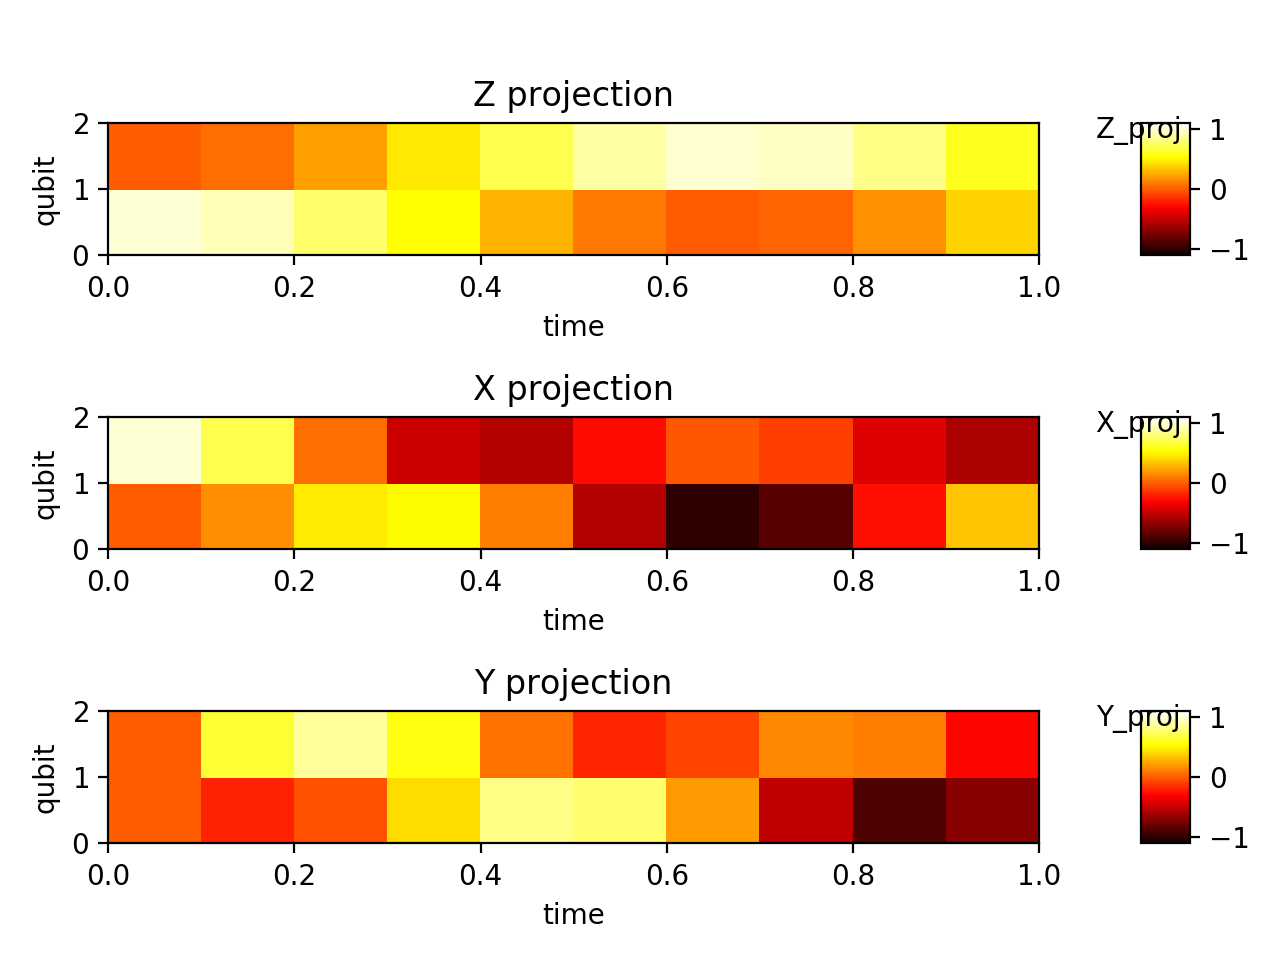

In [62]:
time, x = exact_time_evolution([state_vector_b], create_heisenberg_u, 0.1, 1, J=5, h=5)
pl = plot_projections(x, projection_axes=['Z', 'X', 'Y'], x_axis=time)

In [56]:
mpo_list = [partial(create_heisenberg_unitary_mpo, even=True), partial(create_heisenberg_unitary_mpo, even=False)]

<IPython.core.display.Javascript object>


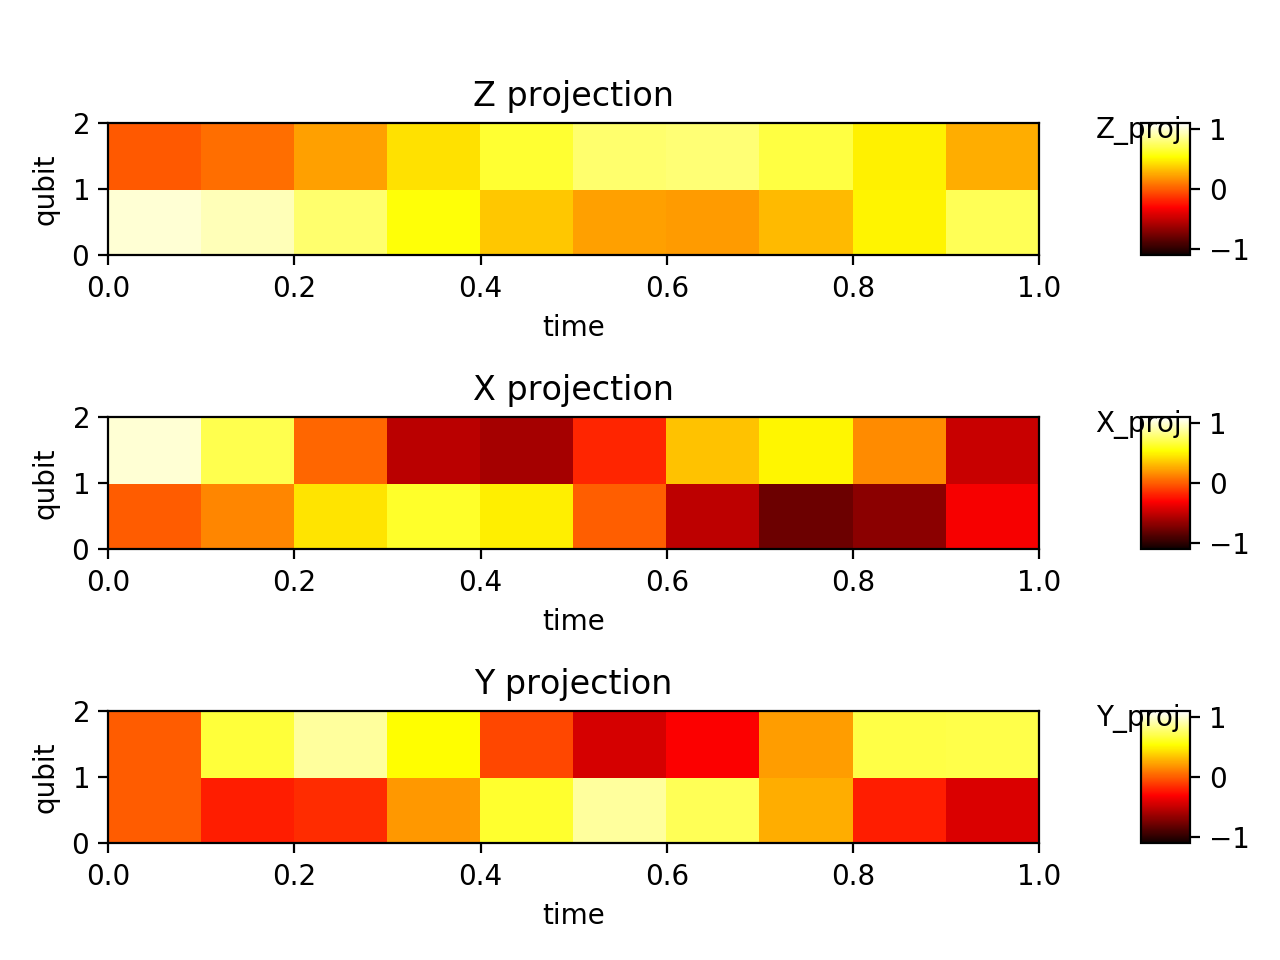

In [61]:
time, x = time_evolution([b], mpo_list, 0.1, 1, J=5, h=5, max_d=20)
evaluated_array = np.array([evaluate_mps(i) for i in x[0]])
pl = plot_projections(evaluated_array, projection_axes=['Z', 'X', 'Y'], x_axis=time)

In [32]:
evaluated_array.shape

(21, 4)

In [7]:
heis_even_unitary = create_heisenberg_unitary_mpo(2, 2, 1, np.pi/4, even=True)
heis_odd_unitary = create_heisenberg_unitary_mpo(2, 2, 1, np.pi/4, even=False)

In [5]:
# np.isclose(heis_even_unitary[0], mpo[0])

In [6]:
# print([i.shape for i in heis_even_unitary])
# print([i.shape for i in heis_odd_unitary])
# print([i.shape for i in mpo_heis])

In [8]:
e = do_mpo_on_mps(heis_even_unitary, a)
e1 = do_mpo_on_mps(heis_odd_unitary, e)

In [10]:
print([i.shape for i in a])
print([i.shape for i in e1])

[(2, 1, 2), (2, 2, 1)]
[(2, 1, 8), (2, 8, 1)]


In [11]:
np.linalg.norm(evaluate_mps(e))

1.0

In [15]:
e2 = normalise_mps(e1, direction='R', max_d=4)
e3 = normalise_mps(e2, direction='L')

In [16]:
print('state a is ' + state_vectors_one_to_many(evaluate_mps(a), as_str=True))
print('state e is ' + state_vectors_one_to_many(evaluate_mps(e), as_str=True))
print('state e1 is ' + state_vectors_one_to_many(evaluate_mps(e1), as_str=True))

state a is 1.0+0.0j |00>
state e is 0.6-0.8j |00>
state e1 is 0.6-0.8j |00>


In [50]:
f = do_mpo_on_mps(heis_even_unitary, b)
f1 = do_mpo_on_mps(heis_odd_unitary, f)

In [51]:
print('state b is ' + state_vectors_one_to_many(evaluate_mps(b), as_str=True))
print('state f is ' + state_vectors_one_to_many(evaluate_mps(f), as_str=True))
print('state f1 is ' + state_vectors_one_to_many(evaluate_mps(f1), as_str=True))

state b is 0.6+0.0j |0011>+ 0.6+0.0j |0100>+ 0.6+0.0j |1111>
state f is 0.4-0.4j |0011>+ 0.3-0.3j |0100>+ -0.2-0.3j |1000>+ 0.5+0.2j |1111>
state f1 is -0.1-0.3j |0010>+ 0.4-0.2j |0011>+ 0.3-0.1j |0100>+ -0.2-0.4j |0101>+ -0.4-0.1j |1000>+ 0.5+0.2j |1111>


In [52]:
evaluate_mps(f)

array([0.00 + 0.00i, 0.00 + 0.00i, 0.00 + 0.00i, 0.41 + -0.41i,
       0.27 + -0.31i, 0.00 + 0.00i, 0.00 + 0.00i, 0.00 + 0.00i,
       -0.23 + -0.34i, 0.00 + -0.00i, -0.00 + 0.00i, -0.00 + 0.00i,
       -0.00 + 0.00i, -0.00 + 0.00i, 0.00 + 0.00i, 0.53 + 0.22i])

In [33]:
abs(find_overlap(a, e))

0.94660700455334967

In [34]:
do_evolution(a, [mpo_heis_u], 5, max_d=8)

NameError: name 'mpo_heis_u' is not defined

In [33]:
np.set_printoptions(formatter={'complexfloat': lambda x: '{0.real:.2f} + {0.imag:.2f}i'.format(x)})
# np.set_printoptions(precision=0)